# Explore here

In [ ]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [2]:
df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv', sep=";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [4]:
df.shape

(41188, 21)

In [ ]:
#miramos los valores de la columnas numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.00,40.02,10.42,17.00,32.00,38.00,47.00,98.00
duration,41188.00,258.29,259.28,0.00,102.00,180.00,319.00,4918.00
campaign,41188.00,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,41188.00,962.48,186.91,0.00,999.00,999.00,999.00,999.00
previous,41188.00,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41188.00,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41188.00,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41188.00,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41188.00,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,41188.00,5167.04,72.25,4963.60,5099.10,5191.00,5228.10,5228.10


In [ ]:
#este dataframe tiene una gran parte de datos categóricos, que habrá que cambiar a numéricos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Las filas sin datos estan representadas como 'unknown' y no como Nan
df[df.isin(['unknown']).any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.10,94.77,-50.80,1.05,4963.60,no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.05,4963.60,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.10,94.77,-50.80,1.05,4963.60,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.10,94.77,-50.80,1.04,4963.60,no


In [8]:
#buscamos exactamente cuanto unknown hay
for col in df:
    unknown_count = (df[col] == 'unknown').sum()
    print(f"{col}: {unknown_count} unknowns ({unknown_count/len(df)})")

age: 0 unknowns (0.0)
job: 330 unknowns (0.008012042342429833)
marital: 80 unknowns (0.0019423132951345051)
education: 1731 unknowns (0.042026803923472855)
default: 8597 unknowns (0.20872584247839177)
housing: 990 unknowns (0.0240361270272895)
loan: 990 unknowns (0.0240361270272895)
contact: 0 unknowns (0.0)
month: 0 unknowns (0.0)
day_of_week: 0 unknowns (0.0)
duration: 0 unknowns (0.0)
campaign: 0 unknowns (0.0)
pdays: 0 unknowns (0.0)
previous: 0 unknowns (0.0)
poutcome: 0 unknowns (0.0)
emp.var.rate: 0 unknowns (0.0)
cons.price.idx: 0 unknowns (0.0)
cons.conf.idx: 0 unknowns (0.0)
euribor3m: 0 unknowns (0.0)
nr.employed: 0 unknowns (0.0)
y: 0 unknowns (0.0)


In [ ]:
#en las filas que hay 'unknown' vemos exactamente esas filas
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [10]:
#default tiene un 20% de datos con unknown y solo 3 sies, los demas son noes. 
#Al haber solo 3 síes de 41148, considero que esta columna no afecta en nada 
#a los datos del dataframe 

In [11]:
df.drop(columns=['default'], inplace=True)

In [12]:
#de las demas columnas que tienen unknowns: job, marital, 
# housing, loan, tienen pocos asi que borramos las filas que son = 0 
df = df.drop(df[df[['housing', 'loan', 'marital', 'job']].isin(['unknown']).any(axis=1)].index)

In [13]:
df['education'].value_counts()

education
university.degree      11821
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
unknown                 1558
illiterate                18
Name: count, dtype: int64

In [14]:
for col in df:
    unknown_count = (df[col] == 'unknown').sum()
    print(f"{col}: {unknown_count} unknowns ({unknown_count/len(df):.2%})")

age: 0 unknowns (0.00%)
job: 0 unknowns (0.00%)
marital: 0 unknowns (0.00%)
education: 1558 unknowns (3.91%)
housing: 0 unknowns (0.00%)
loan: 0 unknowns (0.00%)
contact: 0 unknowns (0.00%)
month: 0 unknowns (0.00%)
day_of_week: 0 unknowns (0.00%)
duration: 0 unknowns (0.00%)
campaign: 0 unknowns (0.00%)
pdays: 0 unknowns (0.00%)
previous: 0 unknowns (0.00%)
poutcome: 0 unknowns (0.00%)
emp.var.rate: 0 unknowns (0.00%)
cons.price.idx: 0 unknowns (0.00%)
cons.conf.idx: 0 unknowns (0.00%)
euribor3m: 0 unknowns (0.00%)
nr.employed: 0 unknowns (0.00%)
y: 0 unknowns (0.00%)


In [15]:
#education tiene un 3.91% de datos unknow y lo voy a cambiar por la moda
education_mode = df[df['education'] != 'unknown']['education'].mode()[0]
df['education'] = df['education'].replace('unknown', education_mode)

In [16]:
#miramos si hay filas duplicadas
df.duplicated().sum()

np.int64(14)

In [ ]:
#borramos las filas duplicadas
df.drop_duplicates()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [ ]:
#miramos las demás filas
df['y'].value_counts()

y
no     35316
yes     4487
Name: count, dtype: int64

In [ ]:
#nos fijamos en cuantos valores tiene cada columna para tomar decisiones con el objetivo de cambiarlas a numéricas
df.nunique()

age                 78
job                 11
marital              3
education            7
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1532
campaign            41
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [20]:
#aqui vemos que podemos hacer onehotnencoding de housing, loan, contact 
df = pd.get_dummies(df, columns=['housing', 'loan', 'contact'], drop_first=True)

In [21]:
df

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housing_yes,loan_yes,contact_telephone
0,56,housemaid,married,basic.4y,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,False,False,True
1,57,services,married,high.school,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,False,False,True
2,37,services,married,high.school,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,True,False,True
3,40,admin.,married,basic.6y,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,False,False,True
4,56,services,married,high.school,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes,True,False,False
41184,46,blue-collar,married,professional.course,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no,False,False,False
41185,56,retired,married,university.degree,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no,True,False,False
41186,44,technician,married,professional.course,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes,False,False,False


In [22]:
#convertimos a numéricos los boolenaos
df[['housing_yes', 'loan_yes', 'contact_telephone']] = df[['housing_yes', 'loan_yes', 'contact_telephone']].astype(int)

In [23]:
df['education'].value_counts()

education
university.degree      13379
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
illiterate                18
Name: count, dtype: int64

In [24]:
#usamos .map para cambiar todas las columnas categorricas a numericas
job_map = {
    'housemaid': 0,
    'services': 1,
    'admin.': 2,
    'blue-collar': 3,
    'technician': 4,
    'retired': 5,
    'management': 6,
    'unemployed': 7,
    'self-employed': 8,
    'entrepreneur': 9,
    'student': 10
}
marital_map = {
    'married': 0,
    'single': 1,
    'divorced': 2
}
education_map = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6
}
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_map = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5
}
poutcome_map = {
    'nonexistent': 0,
    'failure': 1,
    'success': 2
}
y_map = {
    'no': 0,
    'yes': 1
}

In [25]:
df['job'] = df['job'].map(job_map)
df['marital'] = df['marital'].map(marital_map)
df['education'] = df['education'].map(education_map)
df['month'] = df['month'].map(month_map)
df['day_of_week'] = df['day_of_week'].map(day_map)
df['poutcome'] = df['poutcome'].map(poutcome_map)
df['y'] = df['y'].map(y_map)

In [ ]:
#ya tenemos todas las columnas numéricas
df.head()

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housing_yes,loan_yes,contact_telephone
0,56,0,0,1,5,1,261,1,999,0,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,1
1,57,1,0,4,5,1,149,1,999,0,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,1
2,37,1,0,4,5,1,226,1,999,0,0,1.10,93.99,-36.40,4.86,5191.00,0,1,0,1
3,40,2,0,2,5,1,151,1,999,0,0,1.10,93.99,-36.40,4.86,5191.00,0,0,0,1
4,56,1,0,4,5,1,307,1,999,0,0,1.10,93.99,-36.40,4.86,5191.00,0,0,1,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39803 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                39803 non-null  int64  
 1   job                39803 non-null  int64  
 2   marital            39803 non-null  int64  
 3   education          39803 non-null  int64  
 4   month              39803 non-null  int64  
 5   day_of_week        39803 non-null  int64  
 6   duration           39803 non-null  int64  
 7   campaign           39803 non-null  int64  
 8   pdays              39803 non-null  int64  
 9   previous           39803 non-null  int64  
 10  poutcome           39803 non-null  int64  
 11  emp.var.rate       39803 non-null  float64
 12  cons.price.idx     39803 non-null  float64
 13  cons.conf.idx      39803 non-null  float64
 14  euribor3m          39803 non-null  float64
 15  nr.employed        39803 non-null  float64
 16  y                  39803 no

In [ ]:
#hacemos la partición de datos
X = df.drop('y', axis = 1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42
)

In [ ]:
#miramos como se queda finalmente
X_train.shape

(31842, 19)

In [31]:
X_test.shape

(7961, 19)

<Axes: >

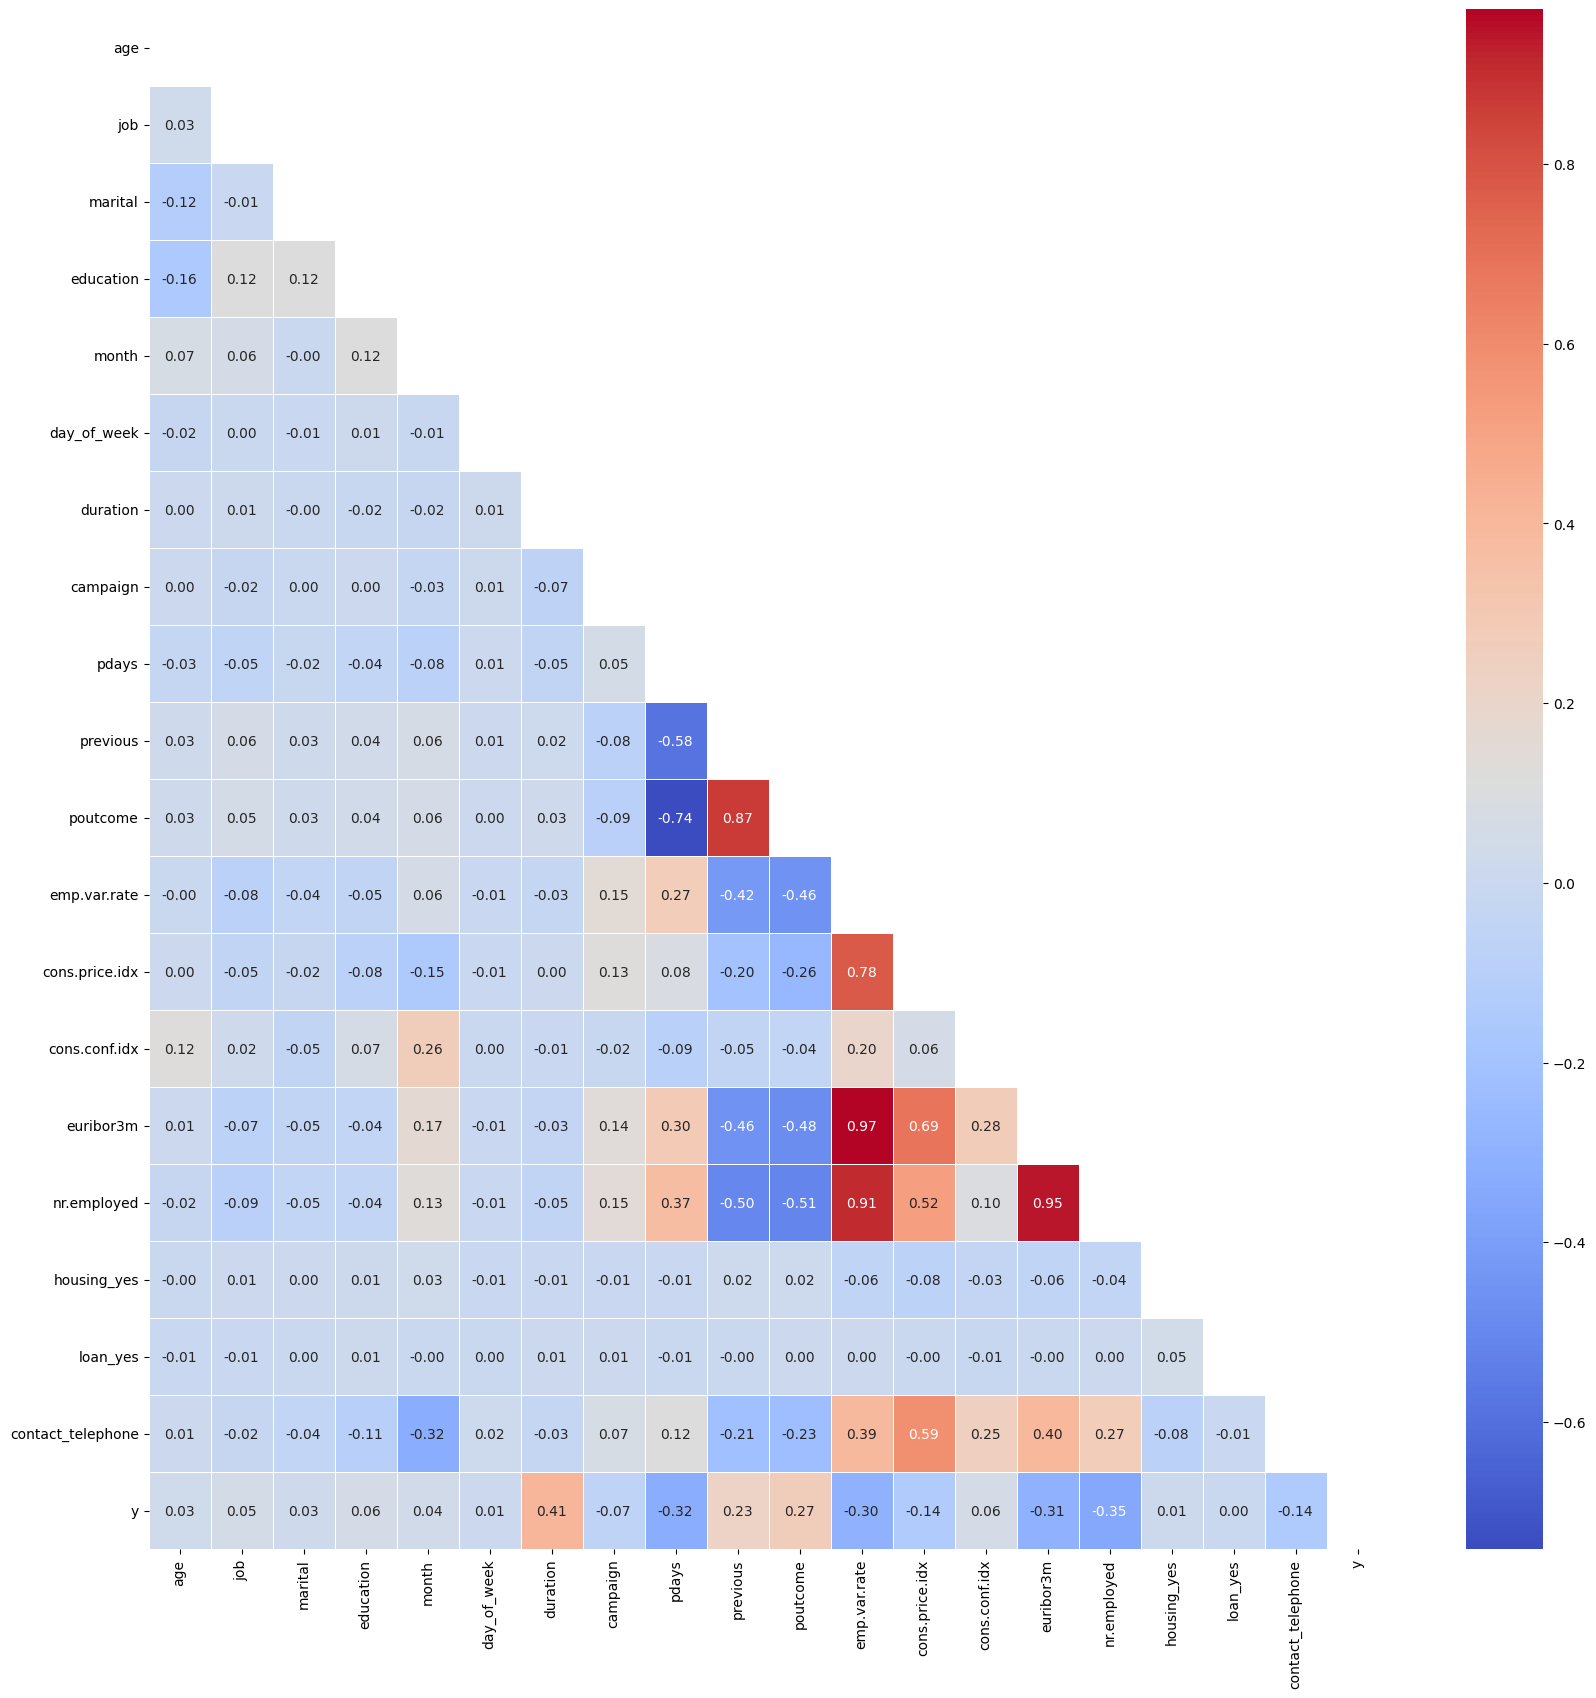

In [ ]:
#calculamos la matriz de correlacion  con un mapa de calor para ver las variables relacionadas entre sí
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [ ]:
#hacemos el VIF para saber tambien las variables que están relacionadas unas con otras 
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

age                     1.30
job                     1.25
marital                 1.13
education               1.53
month                  94.44
day_of_week             1.13
duration                1.22
campaign                2.30
pdays                  31.22
previous              114.28
poutcome              216.83
emp.var.rate        15952.61
cons.price.idx       1139.12
cons.conf.idx         202.53
euribor3m           46937.68
nr.employed         11726.91
housing_yes             1.11
loan_yes                1.01
contact_telephone     133.01
dtype: float64

In [ ]:
# variables como  euribor3m, emp.var.rate, nr.employed, cons.price.idx,
# cons.conf.idx tienen correlacion alta y estan relacionadas entre sí.
# Nos quedamos solo con euribor3m
#Las variables previous, poutcome y pdays tambien tienen correlacion alta 
# nos quedamos solo con poutcome porque es la campaña anterior
X_train.drop(columns=['emp.var.rate', 'nr.employed', 'cons.price.idx', 'cons.conf.idx', 'previous', 'pdays'], inplace=True)

In [49]:
X_test.drop(columns=['emp.var.rate', 'nr.employed', 'cons.price.idx', 'cons.conf.idx', 'previous', 'pdays'], inplace=True)

In [50]:
X_train

,age,job,marital,education,month,day_of_week,duration,campaign,poutcome,euribor3m,housing_yes,loan_yes,contact_telephone
7647,33,8,1,1,5,5,742,2,0,4.86,1,0,1
28955,48,1,1,4,4,5,267,2,1,1.41,1,0,0
16532,28,2,0,6,7,3,118,1,0,4.96,0,0,0
30595,50,3,0,2,5,1,483,4,2,1.35,1,0,1
17971,44,4,2,6,7,2,222,3,0,4.96,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6548,25,6,1,6,5,3,126,4,0,4.86,1,0,1
11795,22,4,1,5,6,5,184,4,0,4.96,0,0,1
39481,45,6,0,6,4,2,379,3,2,0.64,1,0,0
907,46,2,2,3,5,3,423,1,0,4.86,0,0,1


In [ ]:
#CREAMOS EL MODELO DE REGRESION LOGISTICA 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
#hacemos las predicciones 
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6914  161]
 [ 625  261]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7075
           1       0.62      0.29      0.40       886

    accuracy                           0.90      7961
   macro avg       0.77      0.64      0.67      7961
weighted avg       0.88      0.90      0.89      7961



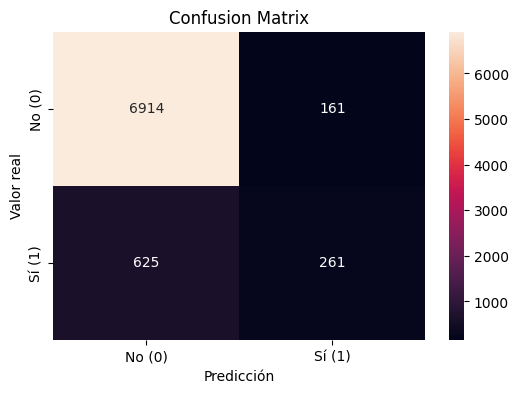

In [ ]:
#hacemos la matriz de confusión para para ver el mapa los resultados mas claros 
cm = confusion_matrix(y_test, y_pred)
labels = ['No (0)', 'Sí (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#aqui vemos las columnas que tienen mas importancia 
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
dict_data = {'Feature':X_train.columns, 'Importancia':xgb_model.feature_importances_*100}
df_imp = pd.DataFrame(dict_data)
df_imp.sort_values(by='Importancia', ascending=False, inplace=True)

In [ ]:
#todas tienen una importancia superior al 1%
df_imp[df_imp['Importancia']>=1]

,Feature,Importancia
9,euribor3m,19.62
6,duration,17.56
8,poutcome,13.31
4,month,9.50
12,contact_telephone,5.88
5,day_of_week,5.00
11,loan_yes,4.80
3,education,4.66
7,campaign,4.65
1,job,4.31


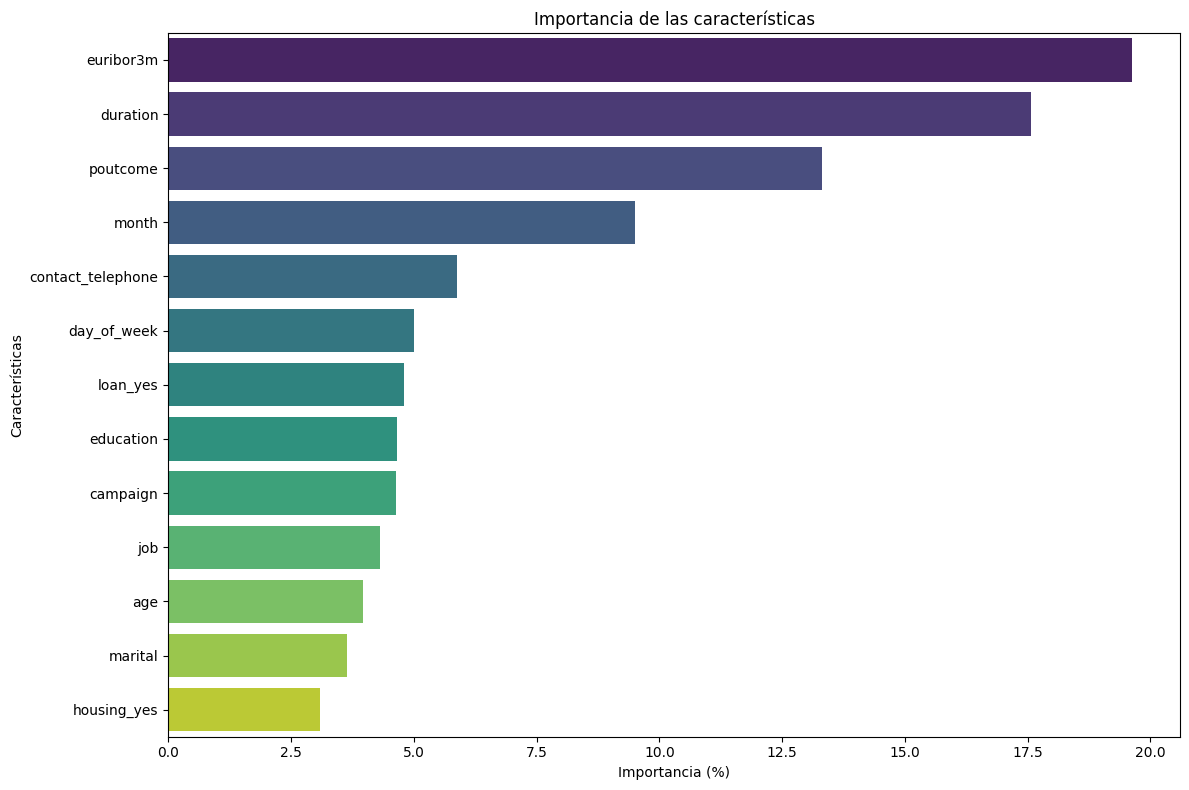

In [69]:
#hacemos un plot donde se ven las columnas que tienen más importancia 
plt.figure(figsize=(12,8))
sns.barplot(x='Importancia', y='Feature', data=df_imp, palette='viridis')
plt.title('Importancia de las características')
plt.xlabel('Importancia (%)')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

Variables como euribor3m, la duración de la llamada, y el resultado de la campaña anterior muestran gran relevancia para la predicción de este proyecto, así que las condiciones económicas afectan a la decisión de inversión, el contacto más largo también se asocia a mayor interés y el resultado de la campaña anterior, refleja la receptividad del cliente. 

El modelo ha obtenido una precisión del 90%, un recall para la clase negativa de un 92% pero solo el 29% de recall para identificar a los clientes que sí contratarán el depósito, un valor bajo que indica que hay pocos clientes potenciales.